# Exploratory Data Analysis on Capital Funding invested on Startups

Import the Libraries

In [1]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Processing
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns
color = sns.color_palette()
import squarify
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None

Obtain the Data

In [2]:
funding_data = pd.read_csv("startup_funding.csv")
funding_data.head(30)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"10,00,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"26,00,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"2,00,00,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"85,00,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"1,20,00,000",NaN


Column Names of the Table

In [3]:
funding_data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [4]:
print("Size of data (Rows, Columns) = ", funding_data.shape)

Size of data (Rows, Columns) =  (2372, 10)


## Data Preprocessing

Missing Data in the Dataset

In [5]:
# Missing Data 
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum() / funding_data.isnull().count()) * 100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head(10)

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
SNo,0,0.000000
Date,0,0.000000
StartupName,0,0.000000


Text(0.5, 1.0, 'Missing null values')

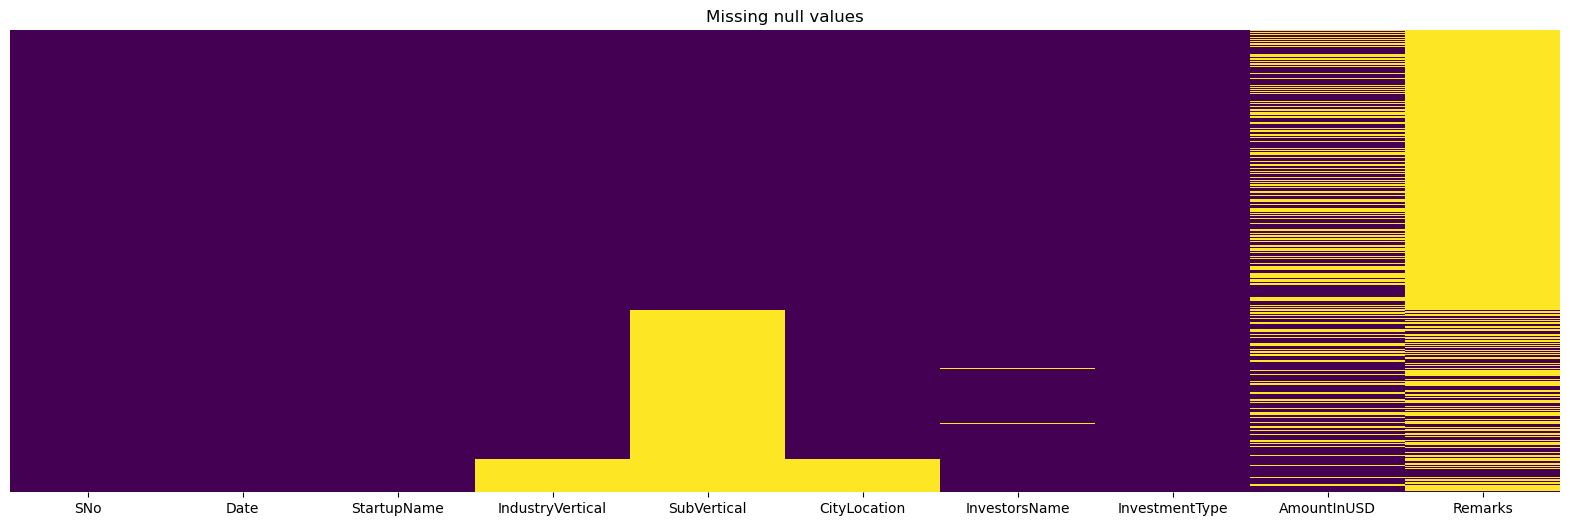

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(funding_data.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

We notice the "Remarks" is missing 82% of data.
Since it doesn't describe the data accurately, we can remove it

In [7]:
del funding_data["Remarks"]
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000"


In [8]:
funding_data["AmountInUSD"].head(4)

0    13,00,000
1          NaN
2          NaN
3     5,00,000
Name: AmountInUSD, dtype: object

"AmountinUSD" is the funding capital received by the startup. It is a string structure, so convert it into numeric

In [9]:
funding_data["AmountInUSD"] = funding_data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
funding_data["AmountInUSD"] = pd.to_numeric(funding_data["AmountInUSD"], downcast='integer')

In [10]:
funding_data["AmountInUSD"].head(8)

0     1300000.0
1           NaN
2           NaN
3      500000.0
4      850000.0
5     1000000.0
6     2600000.0
7    20000000.0
Name: AmountInUSD, dtype: float64

The "Date" represents the date on which the funding was received. Some of the tuples doesn't follow the proper date structre. Fix it by reformatting them

In [11]:
funding_data['Date'][funding_data['Date']=='12/05.2015'] = '12/05/2015'
funding_data['Date'][funding_data['Date']=='13/04.2015'] = '13/04/2015'
funding_data['Date'][funding_data['Date']=='15/01.2015'] = '15/01/2015'
funding_data['Date'][funding_data['Date']=='22/01//2015'] = '22/01/2015'

Handle Duplicate Values

In [12]:
boolean = funding_data['StartupName'].duplicated().any()
boolean

True

In [13]:
funding_data['StartupName'].value_counts()

StartupName
Swiggy              7
UrbanClap           6
Medinfi             5
Jugnoo              5
Wooplr              5
                   ..
Plix                1
ZoomCar             1
NearFox             1
WitWorks            1
couponmachine.in    1
Name: count, Length: 1981, dtype: int64

In [14]:
funding_data[funding_data['StartupName'] == 'Swiggy']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
178,178,30/05/2017,Swiggy,Consumer Internet,Online food delivery platform,Bangalore,"Nasper, Accel India, SAIF Partners, Bessemer V...",Private Equity,80000000.0
708,708,19/09/2016,Swiggy,Consumer Internet,Online Food Ordering & Delivery,Bangalore,Bessemer Venture Partners,Private Equity,15000000.0
1020,1020,10/05/2016,Swiggy,Consumer Internet,Food Delivery Platform,Bangalore,"Norwest Venture Partners, DST Global, Accel Pa...",Private Equity,7000000.0
1386,1386,19/01/2016,Swiggy,Consumer Internet,Online/Mobile food ordering platform,Bangalore,"Harmony Partners, RB Investments & existing in...",Private Equity,35000000.0
2024,2024,09/06/2015,Swiggy,Online Food Ordering,NaN,Bangalore,"Norwest Venture Partners, SAIF Partners, Accel...",Private Equity,16500000.0
2091,2091,06/05/2015,Swiggy,Online Food Delivery,NaN,Bangalore,Norwest Venture Partners,Private Equity,15000000.0
2138,2138,03/04/2015,Swiggy,Online Food Delivery,NaN,Bangalore,"Accel Partners, SAIF Partners",Private Equity,2000000.0


Even though the same startup receives multiple fundings, they are not identical and dataset doesn't have duplicate value

In [15]:
# funding_data.describe(include = "all")

Replace missing values

In [16]:
funding_data['CityLocation'] = funding_data['CityLocation'].fillna(value = 'NotSpecific')

In [17]:
funding_data['IndustryVertical'] = funding_data['IndustryVertical'].fillna(value='Others')

Some CityLocations have two cities in the form A / B. We will reformat that

In [18]:
import re
# convert citylocation where multiple cities exists
def reduceMultiple(x):
    if re.search('/', x):
        return x.split('/')[0].strip() #converting multiple citycentres to single one 
    else :
        return x.strip() # removing extra spaces to reduce duplicate cities

funding_data ['CityLocation'] = funding_data['CityLocation'].apply(reduceMultiple)

InvestorNames Columns

In [19]:
print('Different categories of Investment Type are: ')
funding_data['InvestmentType'].value_counts().index 

Different categories of Investment Type are: 


Index(['Seed Funding', 'Private Equity', 'Crowd Funding', 'Debt Funding',
       'Private Funding'],
      dtype='object', name='InvestmentType')

### Hypothesis Testing

In [20]:
from scipy.stats import shapiro, levene

# data
data = np.random.normal(loc=0, scale=1, size=100)

# Shapiro-Wilk Test for normality 
shapiro_stat, shapiro_p = shapiro(data)
print("Shapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p)

# Levene's Test for homogeneity of variances (example with 3 groups)
group1 = np.random.normal(loc=0, scale=1, size=50)
group2 = np.random.normal(loc=0.5, scale=1.5, size=50)
group3 = np.random.normal(loc=-0.5, scale=0.5, size=50)

levene_stat, levene_p = levene(group1, group2, group3)
print("\nLevene's Test for Homogeneity of Variances:")
print("Test Statistic:", levene_stat)
print("p-value:", levene_p)

Shapiro-Wilk Test for Normality:
Test Statistic: 0.9791392087936401
p-value: 0.11388813704252243

Levene's Test for Homogeneity of Variances:
Test Statistic: 12.978649673129695
p-value: 6.446371001905615e-06


In [21]:
from scipy.stats import kruskal
fd = funding_data.copy()
fd['AmountInUSD'].fillna(0, inplace=True)
fd['IndustryVertical'].fillna("Uncategorised", inplace = True)

sector_groups = [fd[fd['IndustryVertical'] == sector]['AmountInUSD'].unique() for sector in fd['IndustryVertical'].unique()]

# Perform Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*sector_groups)

# Print the results
print("Kruskal-Wallis H-test Results:")
print("H-statistic:", h_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a difference in funding amounts across different sectors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in funding amounts across different sectors.")


Kruskal-Wallis H-test Results:
H-statistic: 855.2124400219657
p-value: 0.002228424894829753
Reject the null hypothesis: There is a difference in funding amounts across different sectors.


# Exploratory Data Analysis

Let's answer: How has the funding ecosystem changed with time and evolve next in the coming years? 

(Characteristics of funding received monthly over time)

Number of discrete fundings made per month (Top 20) yearmonth
201601    104
201602    100
201606     98
201507     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201605     79
201604     79
201609     73
201701     72
201611     72
201612     72
201703     71
Name: count, dtype: int64

Number of discrete fundings made per month (Bottom 15) yearmonth
201708     5
201707    43
201702    48
201501    53
201502    55
201503    60
201505    61
201504    63
201607    64
201706    65
201705    68
201704    71
201703    71
201701    72
201612    72
Name: count, dtype: int64


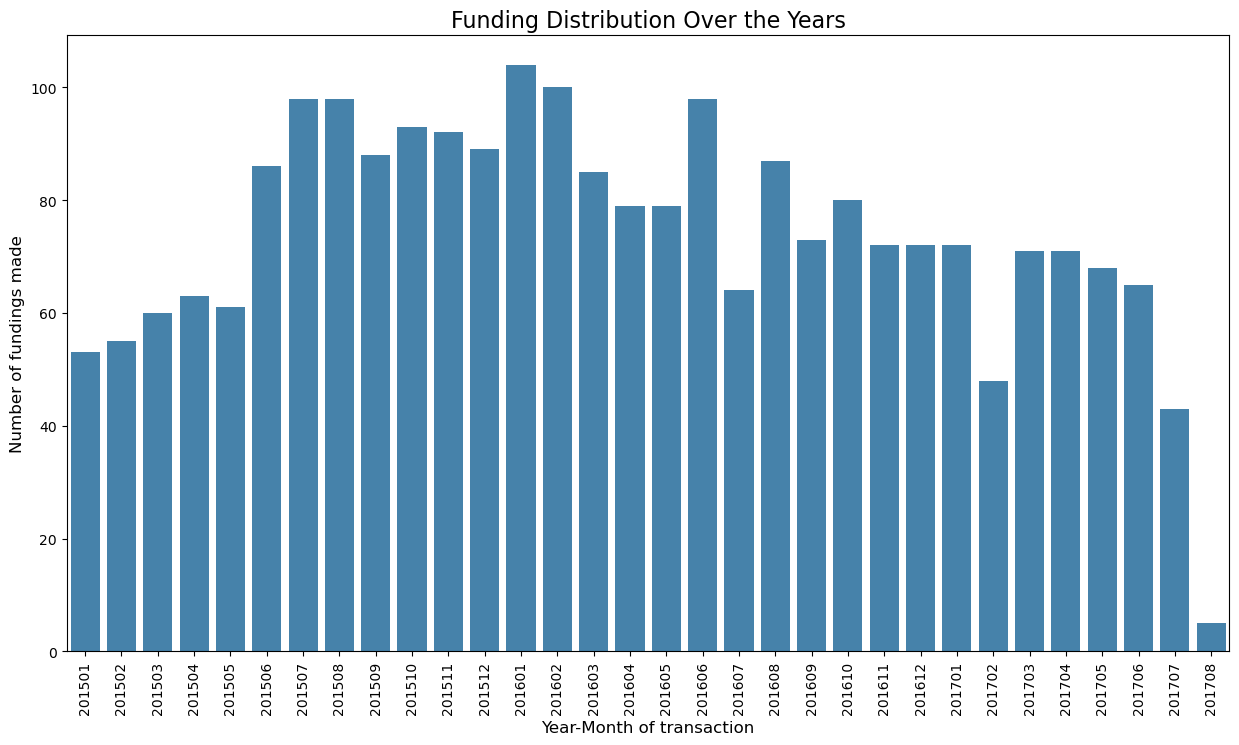

In [22]:
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.month)

# Highest Funded Months
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(20)
print("Number of discrete fundings made per month (Top 20)", temp)

# Lowest Funded Months
t = funding_data['yearmonth'].value_counts().sort_values(ascending = True).head(15)
print("\nNumber of discrete fundings made per month (Bottom 15)", t)

# Bar Plot Visualisation
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x = year_month.index, y = year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Funding Distribution Over the Years", fontsize=16)
plt.show()

We derive the information that startups received peak funding at the start of 2016 as the number exceeded over 100 with January having the highest offers of 104. We also notice that the numbers gradually increased from 2015 to 2016, then we see a gradual decrease 

### Let's analyse the amount of funding received by the startups. We will uncover the maximum, minimum, average value of the money invested

MAXIMUM Funding

In [23]:
print("Maximum funding that was invested in a Startup is : ",funding_data["AmountInUSD"].dropna().sort_values().max())

Maximum funding that was invested in a Startup is :  1400000000.0


The highly valued startup which received funding of $1.4 billion is:

In [24]:
funding_data[funding_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & eCommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


In [25]:
funding_data[funding_data.AmountInUSD > 1000000000]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & eCommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


Let's breakdown the investors, their investment, as well as where and when did they fund:

In [26]:
funding_data[funding_data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & eCommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
821,821,30/08/2016,Paytm,eCommerce,Mobile Wallet & eCommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
1787,1787,29/09/2015,Paytm,E/Commerce & M/Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2218,2218,13/03/2015,Paytm,Others,NaN,NotSpecific,Ratan Tata,Private Equity,NaN,201503
2276,2276,05/02/2015,Paytm,Others,NaN,NotSpecific,Ant Financial Services (Alipay),Private Equity,NaN,201502


In [27]:
funding_data[funding_data.StartupName == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
101,101,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
294,294,21/03/2017,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
360,360,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
1976,1976,28/07/2015,Flipkart,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,201507
2017,2017,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


MINIMUM Funding

In [28]:
print("Minimum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


The lowest valued startup which received funding of $16,000 is:

In [29]:
funding_data[funding_data.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2346,19/01/2015,Play your sport,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2347,19/01/2015,Yo Grad,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2348,19/01/2015,Enabli,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2349,19/01/2015,CBS,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


Let's breakdown the investors, their investment, as well as where and when did they fund:

In [30]:
funding_data[funding_data.StartupName == 'Hostel Dunia']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


In [31]:
funding_data[funding_data.StartupName == 'Play your sport']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2346,2346,19/01/2015,Play your sport,Others,NaN,NotSpecific,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


AVERAGE Funding

In [32]:
print("On Average indian startups got funding of : ",funding_data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


OVERVIEW of Funding

Total startups funded :  1981
StartupName
Swiggy           7
UrbanClap        6
Medinfi          5
Jugnoo           5
Wooplr           5
Paytm            5
Faircent         5
Flipkart         5
NoBroker         5
TinyStep         4
Tracxn           4
YepMe            4
Byju’s           4
Niki.ai          4
Vyomo            4
Voonik           4
Moglix           4
HolaChef         4
Simplilearn      4
Capital Float    4
Ola              4
Ola Cabs         4
Fynd             3
Koovs            3
Healthians       3
Name: count, dtype: int64


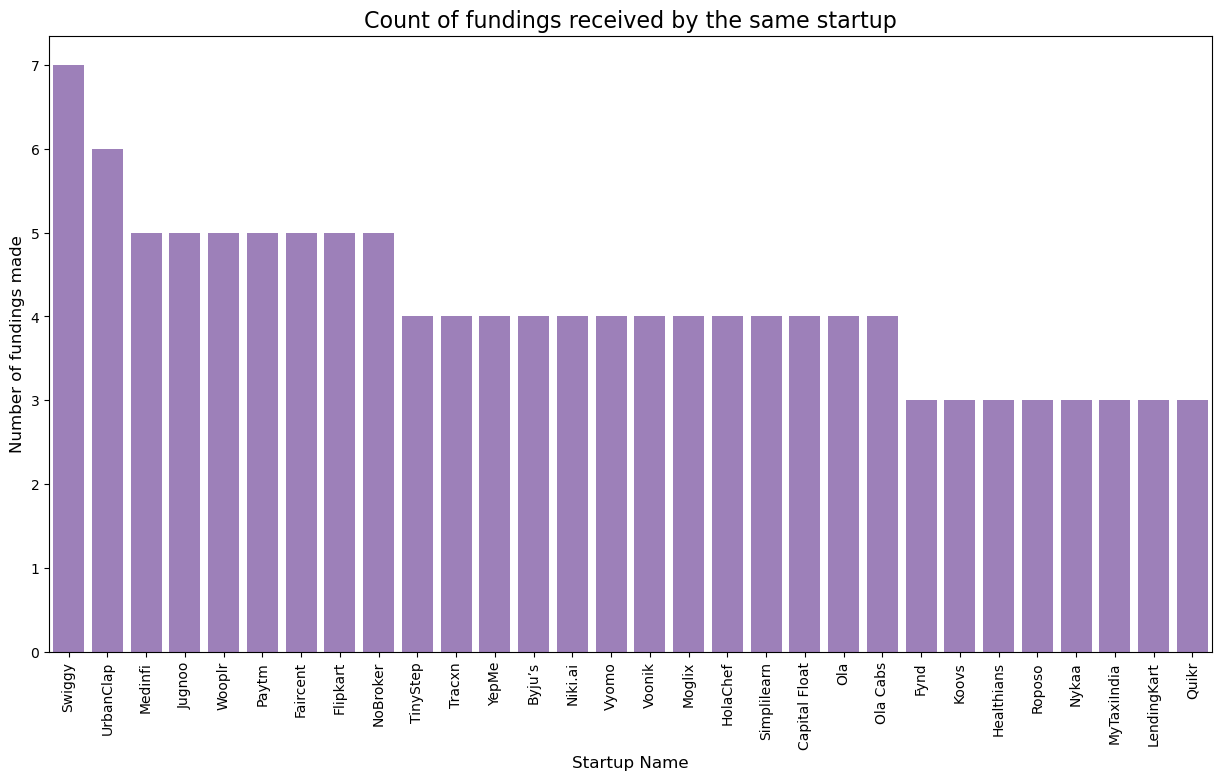

In [33]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(25))
startupname = funding_data['StartupName'].value_counts().head(30)
plt.figure(figsize=(15,8))
sns.barplot(x=startupname.index, y=startupname.values, alpha=0.9, color = color[4])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Count of fundings received by the same startup", fontsize=16)
plt.show()

As we can see, Swiggy received the maximum number of fundings (Total funding = 7) implying 7 different investors funded it. And in total there are 2001 startups funded from January 2015 to August 2017. The above visulization plots for the Top 20 startups.

### Let's analyse what type of industries are favored by investors for funding (OR) the domain of the startups that receive funding

Let's analyse the SECTOR or INDUSTRY of the startups that receiving funding

IndustryVertical
Consumer Internet            772
Technology                   313
eCommerce                    224
Others                       177
Healthcare                    30
Logistics                     24
Education                     20
Food & Beverage               19
Finance                        9
Online Education Platform      5
Name: count, dtype: int64


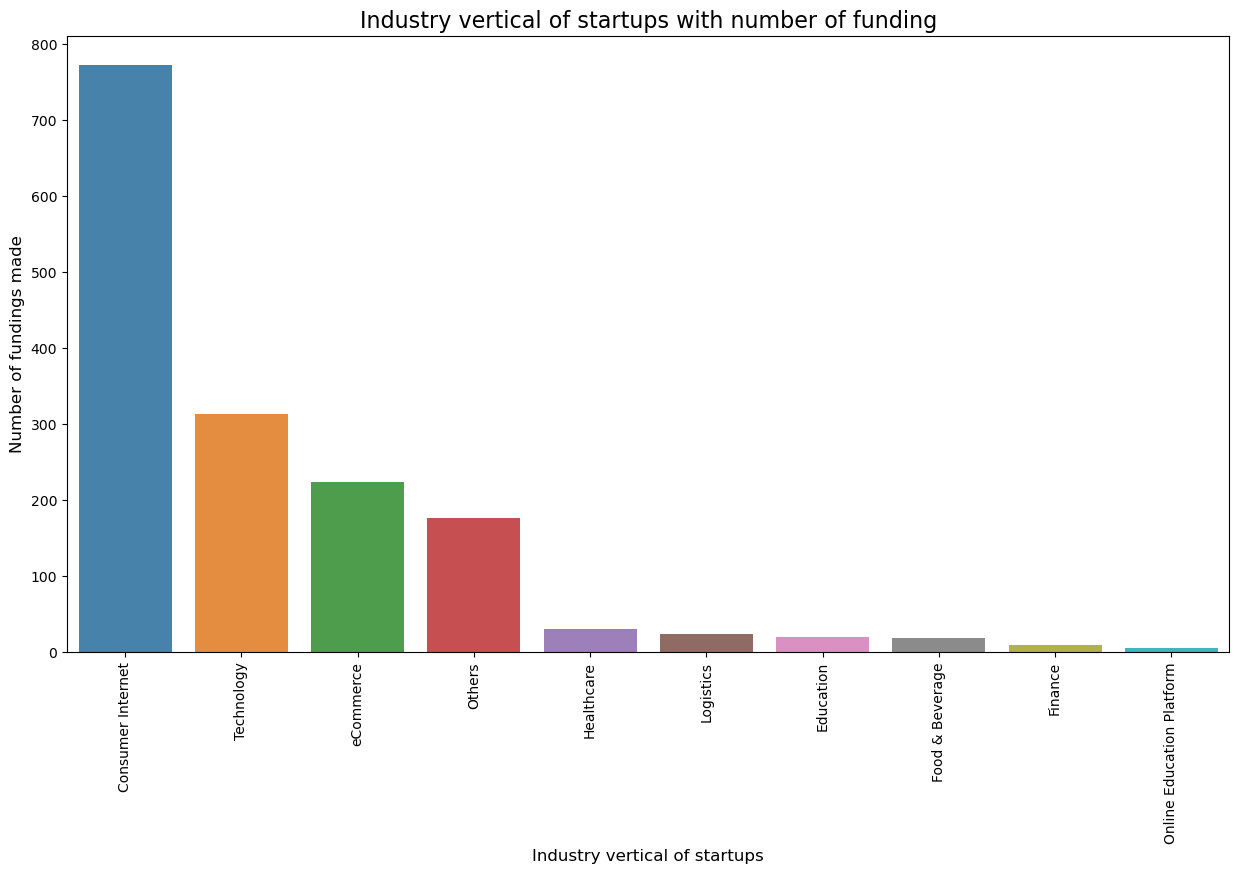

In [47]:
industry = funding_data['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(x=industry.index, y=industry.values, alpha=0.9, palette = color)
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

We observe that the Internet-centric and technology based startups are the next big thing as they have received a lionshare of the fundings

Let's see even specific industries for available data

SubVertical
Online Pharmacy             9
Food Delivery Platform      8
Online lending platform     5
Online Learning Platform    4
eCommerce Marketplace       4
Data Analytics platform     3
Fitness Mobile App          3
Online Payment Gateway      3
Medical Supplies eTailer    2
Online marketplace          2
Name: count, dtype: int64


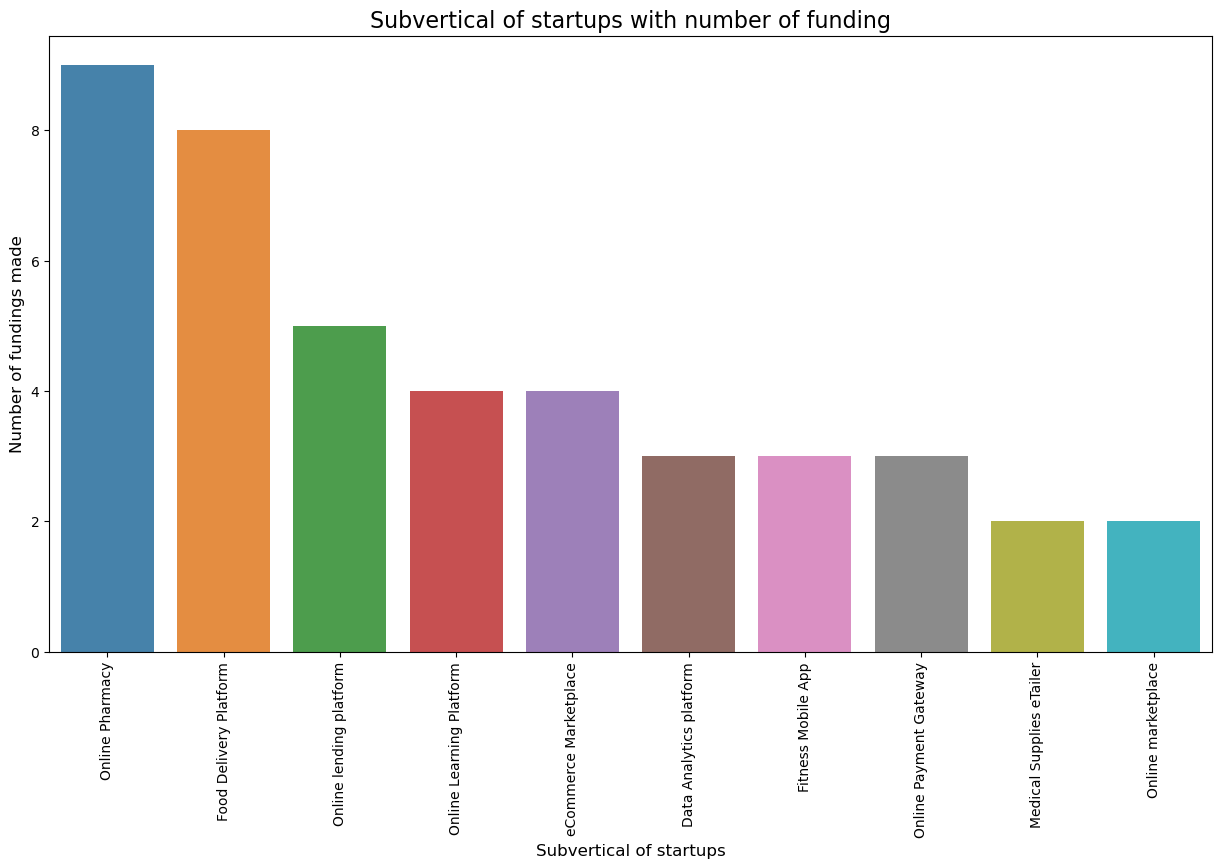

In [35]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(x=industry.index, y=industry.values, alpha=0.9, palette = color)
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

###  Do cities where the startups are based in play a major role in funding? Let's analyse the investment received based on location

LOCATION where these startups are based in

CityLocation
Bangalore      634
Mumbai         449
New Delhi      385
Gurgaon        241
NotSpecific    179
Pune            91
Noida           79
Hyderabad       77
Chennai         67
Ahmedabad       35
Name: count, dtype: int64


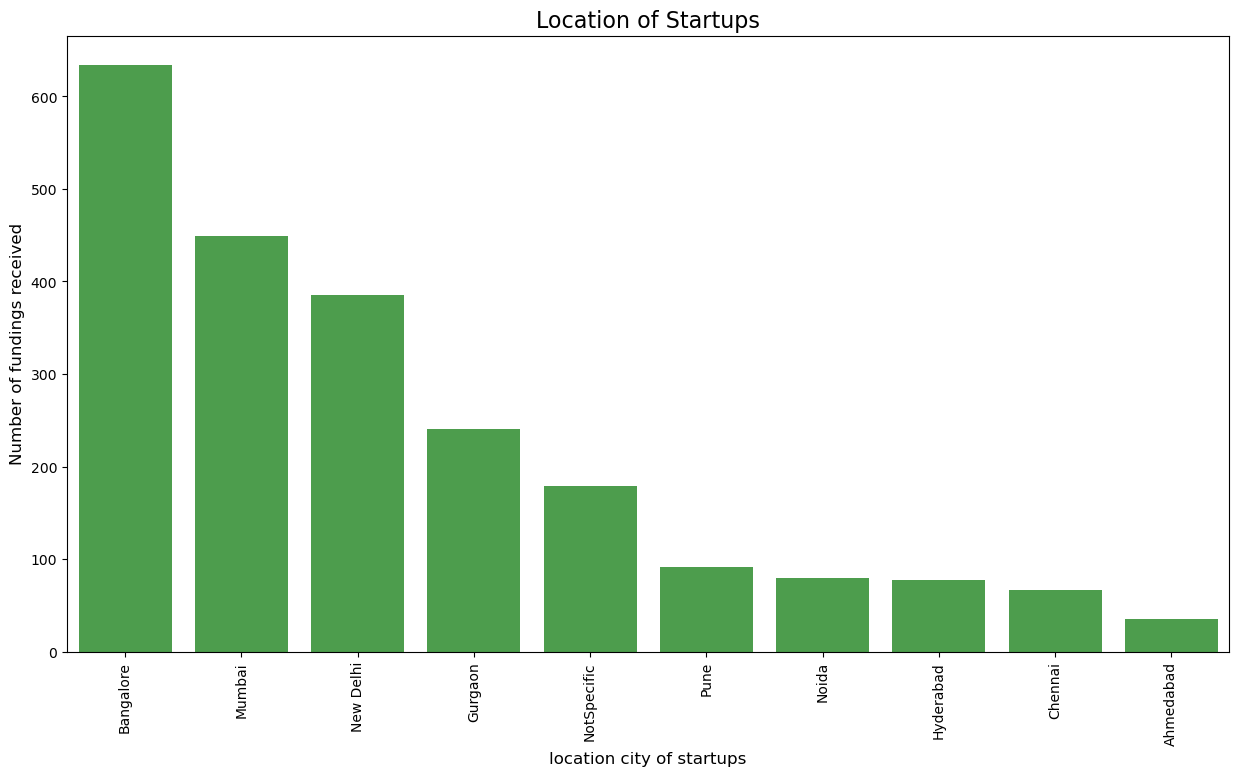

In [36]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(x=city.index, y=city.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('location city of startups', fontsize=12)
plt.ylabel('Number of fundings received', fontsize=12)
plt.title("Location of Startups", fontsize=16)
plt.show()

We notice Bangalore, the Silicon Valley of India, incubates majority of startups. The startups are based in metropolitan cities of Mumbai and New Delhi

Let's visualise the location in a square chart

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

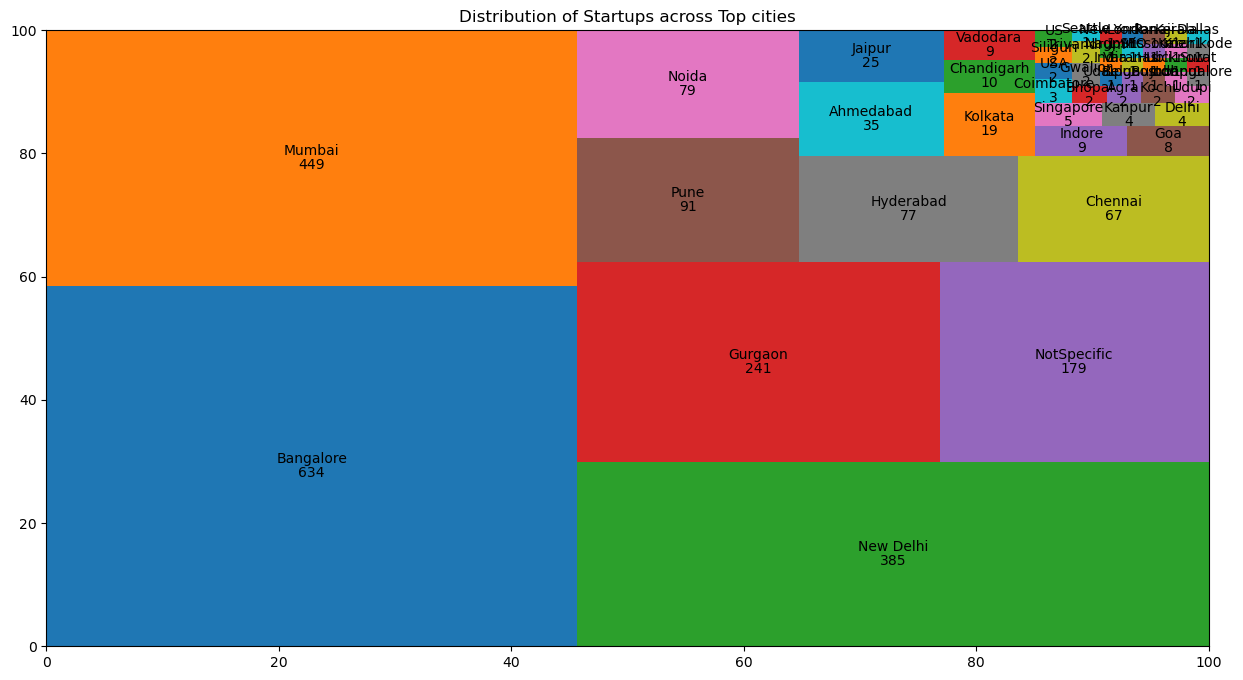

In [37]:
plt.figure(figsize=(15,8))
count = funding_data['CityLocation'].value_counts()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
squarify.plot(sizes=count.values,label=count.index, color = colors, value=count.values)
plt.title('Distribution of Startups across Top cities')

### Who are the important INVESTORS in the startup ecosystem?

In [38]:
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'

InvestorsName
Undisclosed Investors       99
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
RoundGlass Partners         10
Brand Capital               10
Accel Partners               9
SAIF Partners                9
Name: count, dtype: int64


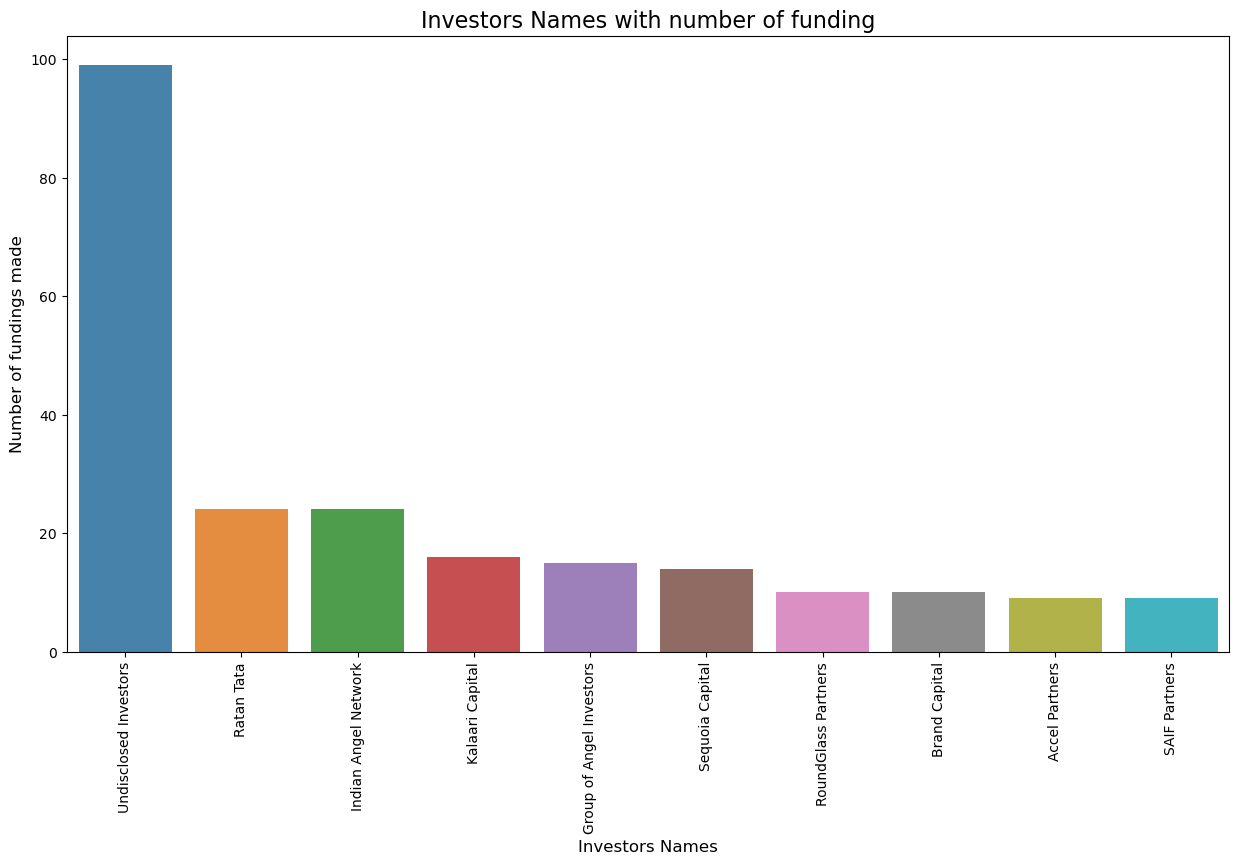

In [39]:
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(x=investors.index, y=investors.values, alpha=0.9, palette=color)
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

We notice that majority of investors in startup choose to remain anonymous. This could be due to protect their financial reputation and avoid the risk of public involvement.

Also notice Ratan Tata is believes in the startup ecosytem as he has made 24 investments.

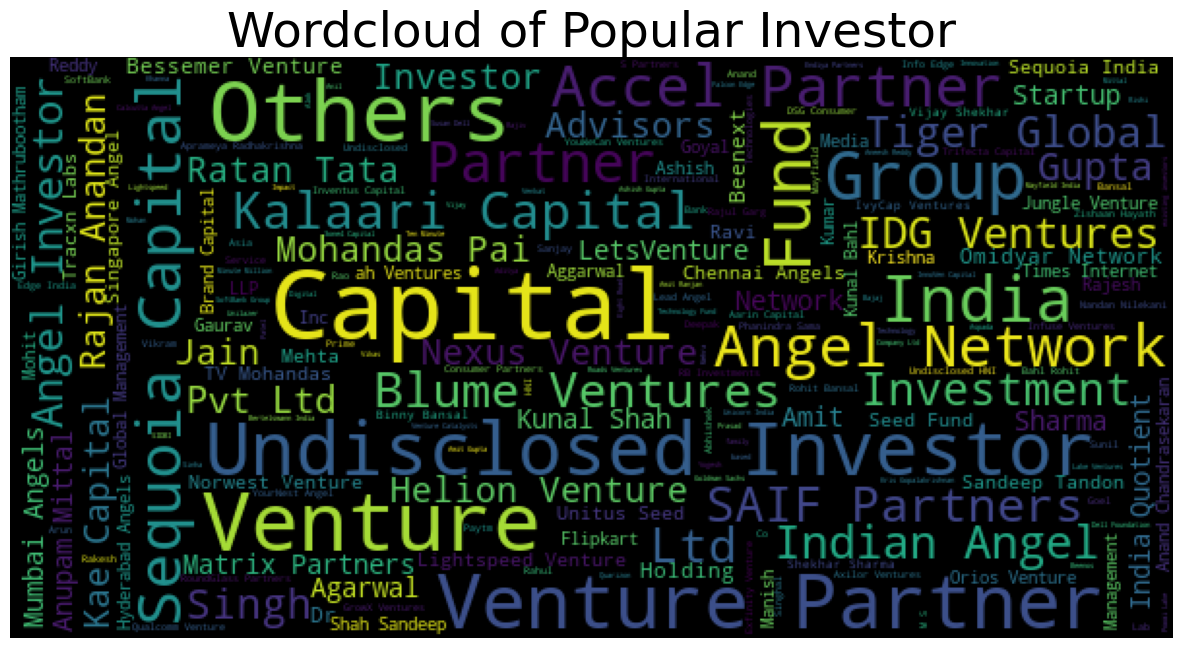

In [40]:
from wordcloud import WordCloud

names = funding_data["InvestorsName"][~pd.isnull(funding_data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud of Popular Investor", fontsize=35)
plt.axis("off")
plt.show()

### Total value of investment made by the investors

In [41]:
newdf = funding_data.copy()

def calculate_n_investors(x):  #function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
    
newdf['numberofinvestors'] = newdf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors) #removing missing investors and replacing with 'empty'

n_inv2=newdf
n_inv=newdf['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))

investors=pd.Series(investors)
unique_investors=pd.Series(unique_investors)

investors=list(investors[investors!=''])
unique_investors=list(unique_investors[unique_investors!=''])

for i in range(len(unique_investors)):
    for j in range(len(investors)):
        if(re.search(unique_investors[i],investors[j])):
            investors[j]=unique_investors[i]

In [42]:
d=dict() #to store individual investors and funding amount in key-value pairs
for i in unique_investors:
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            d[i] = newdf['AmountInUSD'][j]/len(listed_n_inv[j]) #taking average of amount 
            

In [43]:
Investor_amount=pd.Series(d,name='Amount')
Investor_amount = Investor_amount.reset_index().groupby('index').sum()['Amount'].sort_values(ascending=False).head(100)
display(Investor_amount)
Investor_amount = Investor_amount.reset_index()
display(Investor_amount)
Investor_amount.columns=["Investor","Amount"]

index
steadview capital and existing investors     7.000000e+08
microsoft                                    4.666667e+08
alibaba group                                3.400000e+08
softbank group corp                          3.300000e+08
simi pacific pte                             2.600000e+08
                                                 ...     
times of india group & existing investors    1.350000e+07
bessemer venture                             1.333333e+07
premjiinvest                                 1.333333e+07
falcon edge capital                          1.333333e+07
nasper                                       1.333333e+07
Name: Amount, Length: 100, dtype: float64

,index,Amount
0,steadview capital and existing investors,7.000000e+08
1,microsoft,4.666667e+08
2,alibaba group,3.400000e+08
3,softbank group corp,3.300000e+08
4,simi pacific pte,2.600000e+08
...,...,...
95,times of india group & existing investors,1.350000e+07
96,bessemer venture,1.333333e+07
97,premjiinvest,1.333333e+07
98,falcon edge capital,1.333333e+07


Top 10 Most funded Investors
                                   Investor        Amount
0  steadview capital and existing investors  7.000000e+08
1                                 microsoft  4.666667e+08
2                             alibaba group  3.400000e+08
3                       softbank group corp  3.300000e+08
4                          simi pacific pte  2.600000e+08
5   ontario teachers’ pension plan & others  2.000000e+08
6                   ctrip international ltd  1.800000e+08
7                                   alibaba  1.666667e+08
8                              abraaj group  1.500000e+08
9                            warburg pincus  1.370000e+08


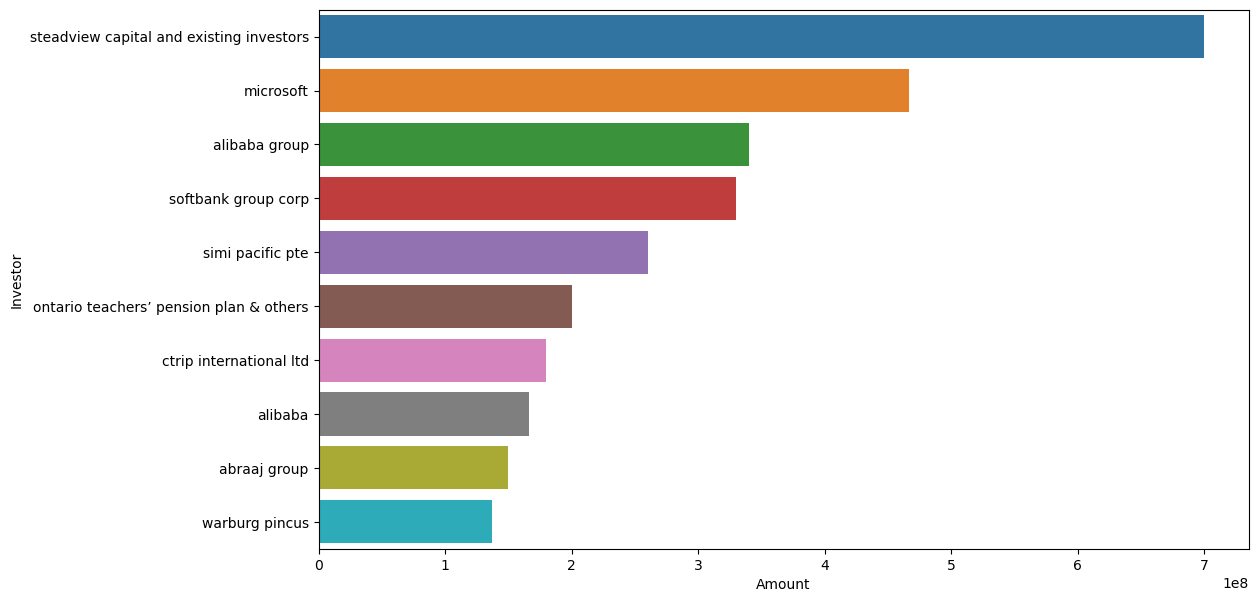

In [44]:
print('Top 10 Most funded Investors')
plt.figure(figsize=(12,7))
sns.barplot(y='Investor', x='Amount', data=Investor_amount.head(10))
print(Investor_amount.head(10))
plt.show()

### Let's take a look into the TYPES of Funding and analyse the characteristics of the Funding like at what level and stage is this funding made 

In [45]:
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

InvestmentType
Seed Funding       1301
Private Equity     1066
Crowd Funding         2
Debt Funding          1
Private Funding       1
Name: count, dtype: int64


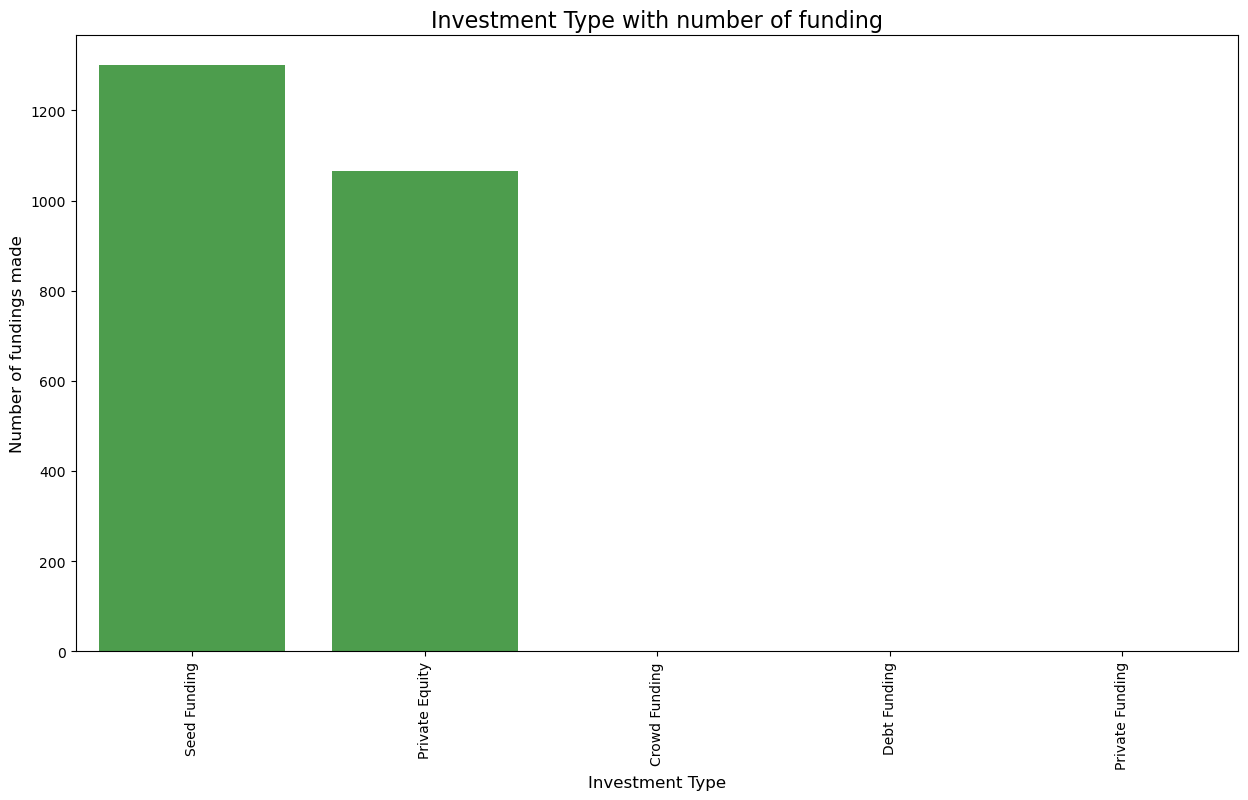

In [46]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(x=investment.index, y=investment.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

We observe there's only two major type of funding for a startup. They are Seed Funding and Private Equity. Seed Funding is where the investor funds the startup in exchange for public stock of the company. Meanwhile private equity is where the investor buys out or acquires majority of the startup. In the latter case, the capital committed is large while the seed funding can have small limits as well.